Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from scipy.stats import linregress
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn import metrics

Load Dataset

In [2]:
df_hp = pd.read_csv("../../Datasets/HarvestDatasetN.csv")
df_hp.head()

,Batch_no,Groowing_room,No_of_bags,Type_of_paddy_straw,Type_of_spawn,Casing,Target_production,Actual_Production
0,100,B1,840,"50% dura,50% AKP","50% syl, 50% myc",LC-678 92% TT-52 8%,919.0,919.0
1,101,A3,262,"50% dura,50% AKP","50% syl, 50% myc",LC100%,618.0,452.0
2,102,A2,154,"50% dura,50% AKP","50% syl, 50% myc",TOPTTERA 100%,765.0,350.0
3,104,A1,785,"50% dura,50% AKP","50% syl, 50% myc",TOPTTERA 100%,1257.0,1368.0
4,105,B1,890,"50% dura,50% AKP","50% syl, 50% myc",TOPTTERA 100%,1424.0,1431.4


Data Cleaning & Preprocessing

In [3]:
df_hp.shape

(249, 8)

In [4]:
df_hp.dtypes

Batch_no                 int64
Groowing_room           object
No_of_bags               int64
Type_of_paddy_straw     object
Type_of_spawn           object
Casing                  object
Target_production      float64
Actual_Production      float64
dtype: object

Check Null Values

In [5]:
df_hp.isna().sum()

Batch_no               0
Groowing_room          0
No_of_bags             0
Type_of_paddy_straw    0
Type_of_spawn          0
Casing                 0
Target_production      0
Actual_Production      0
dtype: int64

Drop Unwanted Columns

In [6]:
df_hp = df_hp.drop(["Target_production"], axis=1)

In [7]:
df_hp = df_hp.drop(["Batch_no"], axis=1)

In [8]:
df_hp.head()

,Groowing_room,No_of_bags,Type_of_paddy_straw,Type_of_spawn,Casing,Actual_Production
0,B1,840,"50% dura,50% AKP","50% syl, 50% myc",LC-678 92% TT-52 8%,919.0
1,A3,262,"50% dura,50% AKP","50% syl, 50% myc",LC100%,452.0
2,A2,154,"50% dura,50% AKP","50% syl, 50% myc",TOPTTERA 100%,350.0
3,A1,785,"50% dura,50% AKP","50% syl, 50% myc",TOPTTERA 100%,1368.0
4,B1,890,"50% dura,50% AKP","50% syl, 50% myc",TOPTTERA 100%,1431.4


Outliers

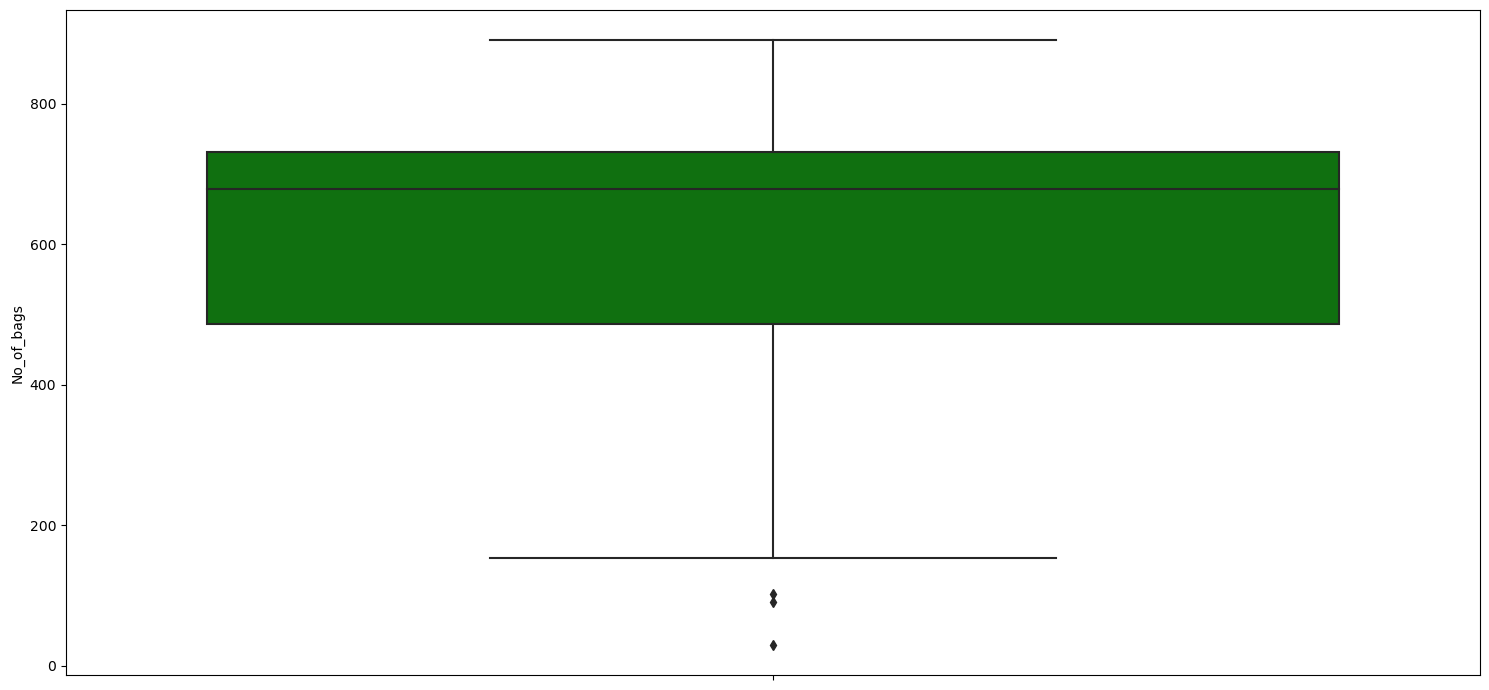

In [9]:
featuresNumfinal = ['No_of_bags']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df_hp[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

In [10]:
df_hp.head()

,Groowing_room,No_of_bags,Type_of_paddy_straw,Type_of_spawn,Casing,Actual_Production
0,B1,840,"50% dura,50% AKP","50% syl, 50% myc",LC-678 92% TT-52 8%,919.0
1,A3,262,"50% dura,50% AKP","50% syl, 50% myc",LC100%,452.0
2,A2,154,"50% dura,50% AKP","50% syl, 50% myc",TOPTTERA 100%,350.0
3,A1,785,"50% dura,50% AKP","50% syl, 50% myc",TOPTTERA 100%,1368.0
4,B1,890,"50% dura,50% AKP","50% syl, 50% myc",TOPTTERA 100%,1431.4


Encode Categorical Variables

In [11]:
le = LabelEncoder()
df_hp['Groowing_room'] = le.fit_transform(df_hp['Groowing_room'])
df_hp.head()

,Groowing_room,No_of_bags,Type_of_paddy_straw,Type_of_spawn,Casing,Actual_Production
0,3,840,"50% dura,50% AKP","50% syl, 50% myc",LC-678 92% TT-52 8%,919.0
1,2,262,"50% dura,50% AKP","50% syl, 50% myc",LC100%,452.0
2,1,154,"50% dura,50% AKP","50% syl, 50% myc",TOPTTERA 100%,350.0
3,0,785,"50% dura,50% AKP","50% syl, 50% myc",TOPTTERA 100%,1368.0
4,3,890,"50% dura,50% AKP","50% syl, 50% myc",TOPTTERA 100%,1431.4


In [12]:
le = LabelEncoder()
df_hp['Type_of_paddy_straw'] = le.fit_transform(df_hp['Type_of_paddy_straw'])
df_hp.head()

,Groowing_room,No_of_bags,Type_of_paddy_straw,Type_of_spawn,Casing,Actual_Production
0,3,840,1,"50% syl, 50% myc",LC-678 92% TT-52 8%,919.0
1,2,262,1,"50% syl, 50% myc",LC100%,452.0
2,1,154,1,"50% syl, 50% myc",TOPTTERA 100%,350.0
3,0,785,1,"50% syl, 50% myc",TOPTTERA 100%,1368.0
4,3,890,1,"50% syl, 50% myc",TOPTTERA 100%,1431.4


In [13]:
le = LabelEncoder()
df_hp['Type_of_spawn'] = le.fit_transform(df_hp['Type_of_spawn'])
df_hp.head()

,Groowing_room,No_of_bags,Type_of_paddy_straw,Type_of_spawn,Casing,Actual_Production
0,3,840,1,4,LC-678 92% TT-52 8%,919.0
1,2,262,1,4,LC100%,452.0
2,1,154,1,4,TOPTTERA 100%,350.0
3,0,785,1,4,TOPTTERA 100%,1368.0
4,3,890,1,4,TOPTTERA 100%,1431.4


In [14]:
le = LabelEncoder()
df_hp['Casing'] = le.fit_transform(df_hp['Casing'])
df_hp.head()

,Groowing_room,No_of_bags,Type_of_paddy_straw,Type_of_spawn,Casing,Actual_Production
0,3,840,1,4,2,919.0
1,2,262,1,4,4,452.0
2,1,154,1,4,5,350.0
3,0,785,1,4,5,1368.0
4,3,890,1,4,5,1431.4


In [15]:
df_hp.dtypes

Groowing_room            int32
No_of_bags               int64
Type_of_paddy_straw      int32
Type_of_spawn            int32
Casing                   int32
Actual_Production      float64
dtype: object

Data Exploration

Button Mushroom Production Distribution

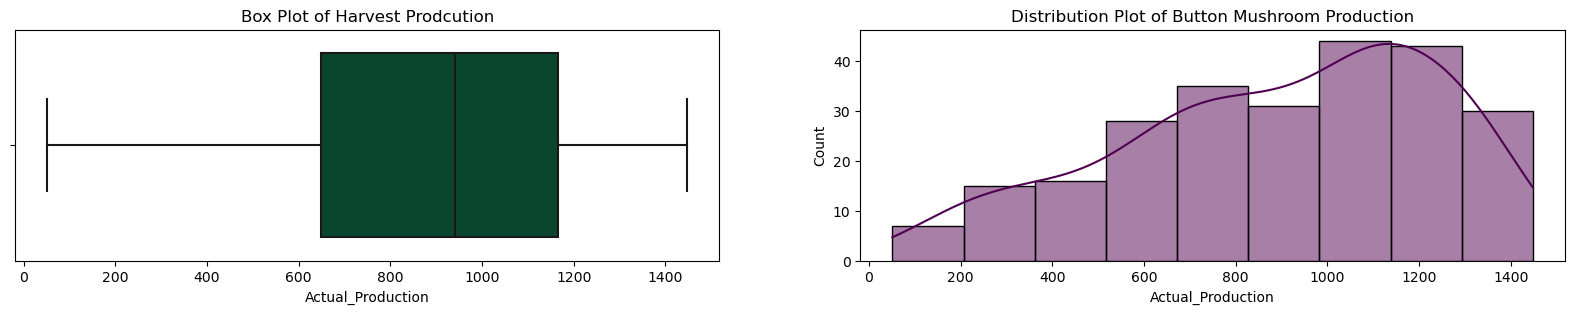

In [16]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=df_hp['Actual_Production'],color='#005030')
plt.title(f'Box Plot of Harvest Prodcution')

plt.subplot(1,2,2)
sns.histplot(x=df_hp['Actual_Production'], color='#500050', kde=True)
plt.title(f'Distribution Plot of Button Mushroom Production')
plt.show()

Visualizing the relationships between features using pair plots 

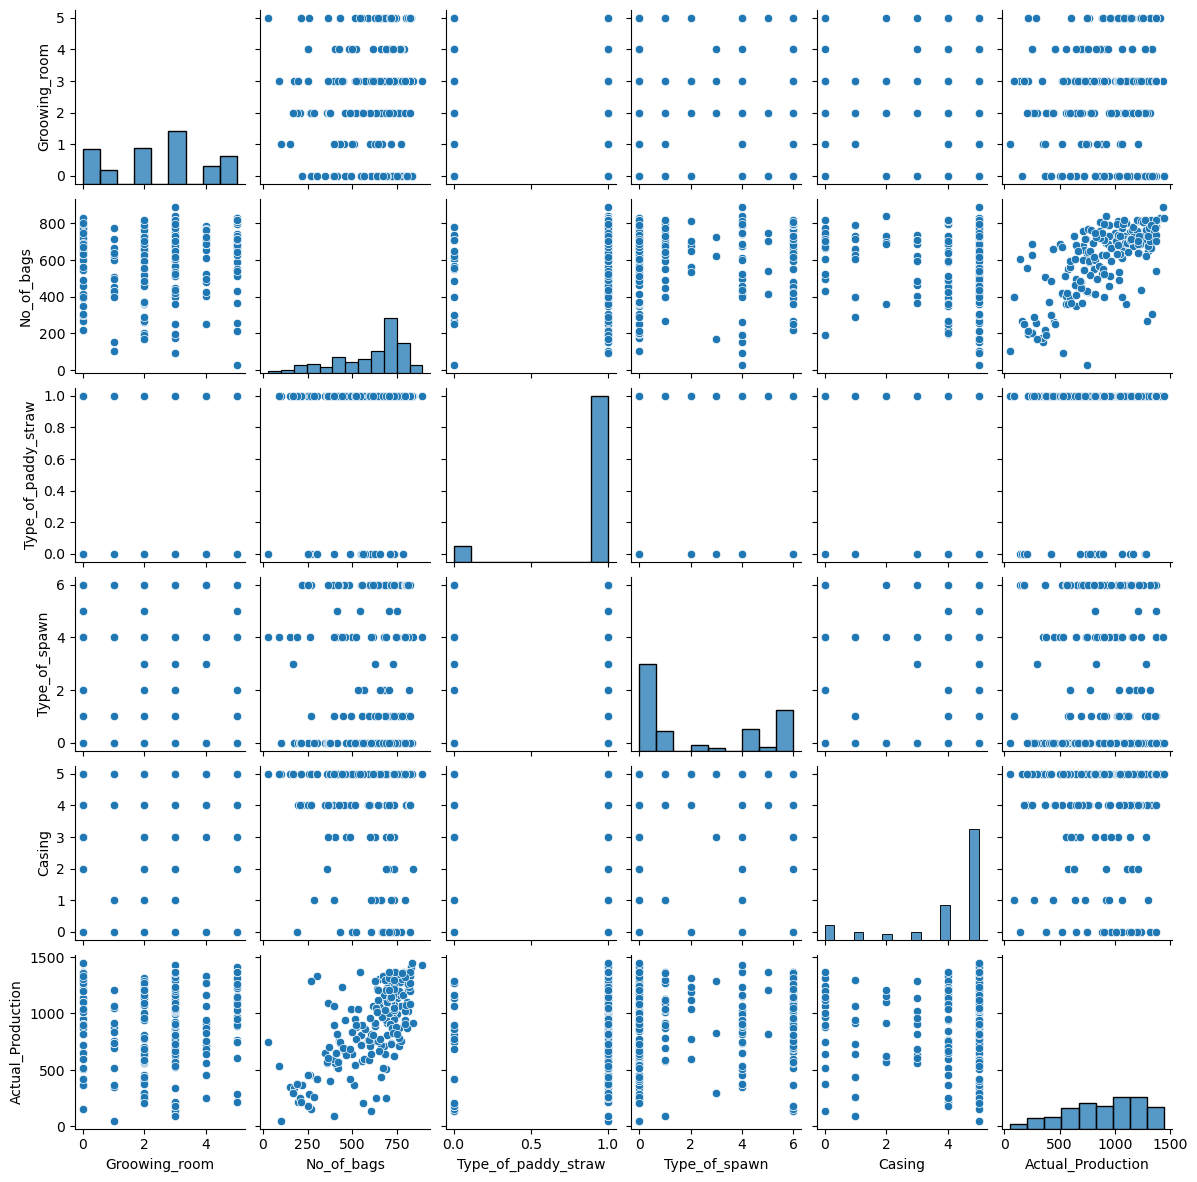

In [17]:
sns.pairplot(data = df_hp, height = 2)  

Linearity

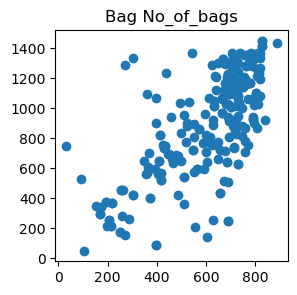

In [18]:
fig, (ax1) = plt.subplots(ncols=1,nrows=1,figsize=(3,3))

ax1.scatter(df_hp['No_of_bags'],df_hp['Actual_Production'])
ax1.set_title("Bag No_of_bags")

plt.show()

Visualizing multicollinearity between independent features using a heatmap  

<AxesSubplot:>

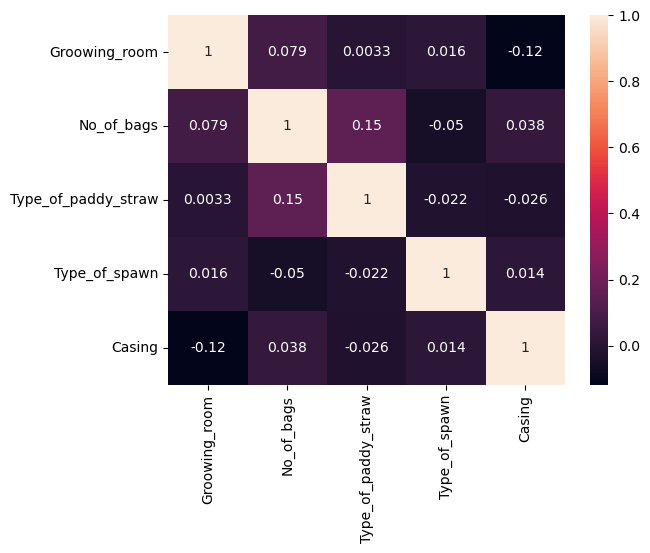

In [19]:
sns.heatmap(df_hp.iloc[:,0:5].corr(),annot=True)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df_hp[['Groowing_room','No_of_bags','Type_of_paddy_straw', 'Type_of_spawn', 'Casing']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

               feature       VIF
0        Groowing_room  3.134416
1           No_of_bags  9.341378
2  Type_of_paddy_straw  8.626396
3        Type_of_spawn  1.687330
4               Casing  5.900451


In [21]:
corr = df_hp[['Groowing_room','No_of_bags','Type_of_paddy_straw', 'Type_of_spawn', 'Casing']].corr()  
print('Pearson correlation coefficient matrix for each independent variable: \n', corr)  

Pearson correlation coefficient matrix for each independent variable: 
                      Groowing_room  No_of_bags  Type_of_paddy_straw  \
Groowing_room             1.000000    0.078988             0.003325   
No_of_bags                0.078988    1.000000             0.154416   
Type_of_paddy_straw       0.003325    0.154416             1.000000   
Type_of_spawn             0.016028   -0.050363            -0.021897   
Casing                   -0.118483    0.037853            -0.026048   

                     Type_of_spawn    Casing  
Groowing_room             0.016028 -0.118483  
No_of_bags               -0.050363  0.037853  
Type_of_paddy_straw      -0.021897 -0.026048  
Type_of_spawn             1.000000  0.014211  
Casing                    0.014211  1.000000  


Heat Map

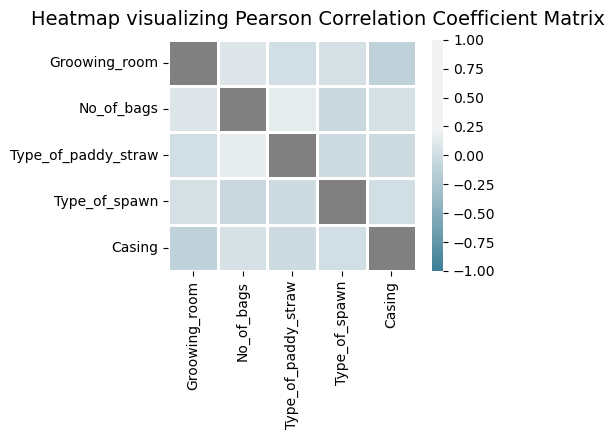

In [24]:
# Masking the diagonal cells   
masking = np.zeros_like(corr, dtype = np.bool_)  
np.fill_diagonal(masking, val = True)  
  
# Initializing a matplotlib figure  
figure, axis = plt.subplots(figsize = (4, 3))  
  
# Generating a custom colormap  
c_map = sns.diverging_palette(223, 14, as_cmap = True, sep = 100)  
c_map.set_bad('grey')  
  
# Displaying the heatmap with the masking and the correct aspect ratio  
sns.heatmap(corr, mask = masking, cmap = c_map, vmin = -1, vmax = 1, center = 1, linewidths = 1)  
figure.suptitle('Heatmap visualizing Pearson Correlation Coefficient Matrix', fontsize = 14)  
axis.tick_params(axis = 'both', which = 'major', labelsize = 10)  

Feature Scaling

In [25]:
y = df_hp["Actual_Production"]
X = df_hp.drop(['Actual_Production'], axis=1)

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(X), index=y.index)
data.columns = X.columns
data.insert(len(data.columns), 'Actual_Production', y)

df_merge_result_scaled = data
df_merge_result_scaled

,Groowing_room,No_of_bags,Type_of_paddy_straw,Type_of_spawn,Casing,Actual_Production
0,0.6,0.941860,1.0,0.666667,0.4,919.0
1,0.4,0.269767,1.0,0.666667,0.8,452.0
2,0.2,0.144186,1.0,0.666667,1.0,350.0
3,0.0,0.877907,1.0,0.666667,1.0,1368.0
4,0.6,1.000000,1.0,0.666667,1.0,1431.4
...,...,...,...,...,...,...
244,0.6,0.572093,1.0,0.666667,0.0,899.4
245,0.6,0.815116,1.0,1.000000,1.0,1046.4
246,0.6,0.070930,1.0,0.666667,1.0,530.9
247,0.6,0.784884,1.0,0.000000,0.0,1368.3


Split into train and test datasets

In [26]:
y=df_merge_result_scaled["Actual_Production"]
x= df_merge_result_scaled.loc[:, df_merge_result_scaled.columns != 'Actual_Production']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [27]:
x_train.shape

(199, 5)

In [28]:
x_test.shape

(50, 5)

In [29]:
y_train.shape

(199,)

In [30]:
y_test.shape

(50,)

In [31]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
kfold = StratifiedKFold(n_splits=10)

Linear Regression

In [32]:
print(cross_val_score(LinearRegression(), x_train, y_train,cv = 3))

[0.47495991 0.33559061 0.51639941]


In [33]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predLM = lm.predict(x_test)

In [34]:
# Accuracy on Training set
print("Training Accuracy is: ", lm.score(x_train, y_train))
# Accuracy on Testing set
print("Testing Accuracy is: ", lm.score(x_test, y_test))

Training Accuracy is:  0.520206048521791
Testing Accuracy is:  0.5145080831972826


In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predLM))
print('MSE:', metrics.mean_squared_error(y_test, y_predLM))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predLM)))
print('R2:',  r2_score(y_test, y_predLM))

MAE: 170.36013599049278
MSE: 49433.49381401208
RMSE: 222.3364428383527
R2: 0.5145080831972826


c:\Users\yasas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\yasas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


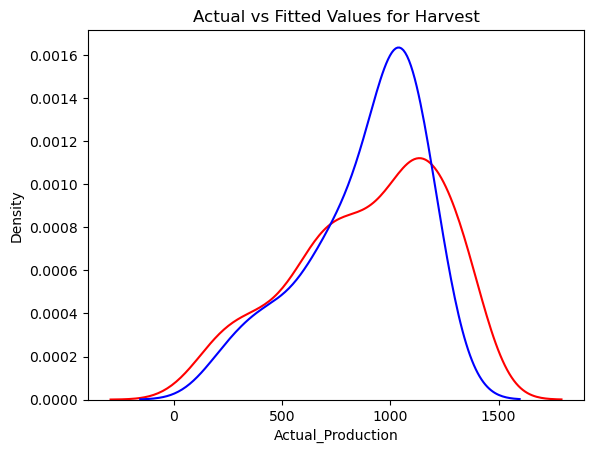

In [36]:
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_predLM, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Harvest')
plt.show()
plt.close()

Decision Tree Regression

In [37]:
print(cross_val_score(DecisionTreeRegressor(), x_train, y_train,cv = 3))

[ 0.35056026 -0.01810533  0.18905176]


In [38]:
dtr = DecisionTreeRegressor(max_depth=7)
dtr.fit(x_train, y_train)
y_predDT = dtr.predict(x_test)

Model Evaluation

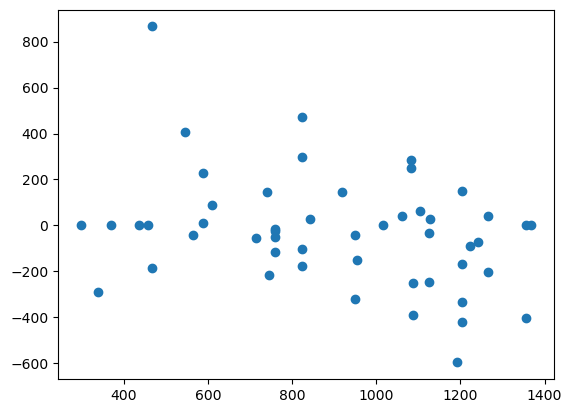

In [39]:
residual = y_test-y_predDT
plt.scatter(y_predDT,residual)

Text(0.5, 0, 'Feature Importance')

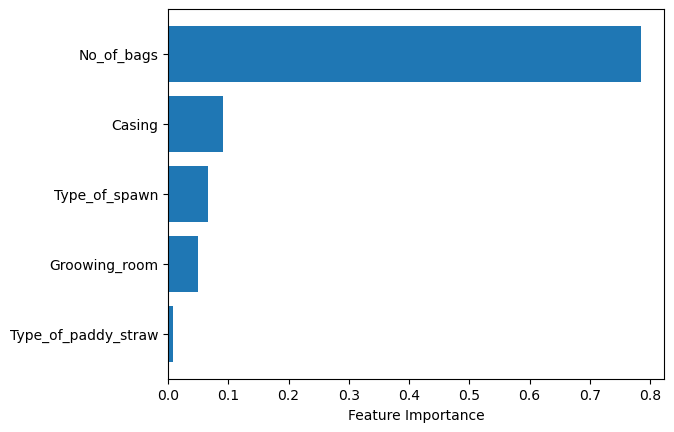

In [40]:
sort = dtr.feature_importances_.argsort()
plt.barh(df_hp.columns[sort], dtr.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [41]:
# Accuracy on Training set
print("Training Accuracy is: ", dtr.score(x_train, y_train))
# Accuracy on Testing set
print("Testing Accuracy is: ", dtr.score(x_test, y_test))

Training Accuracy is:  0.9174727791149646
Testing Accuracy is:  0.405591628197438


In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predDT))
print('MSE:', metrics.mean_squared_error(y_test, y_predDT))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predDT)))
print('R2:',  r2_score(y_test, y_predDT))

MAE: 170.6777777056277
MSE: 60523.52583748408
RMSE: 246.01529594211024
R2: 0.405591628197438


c:\Users\yasas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\yasas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


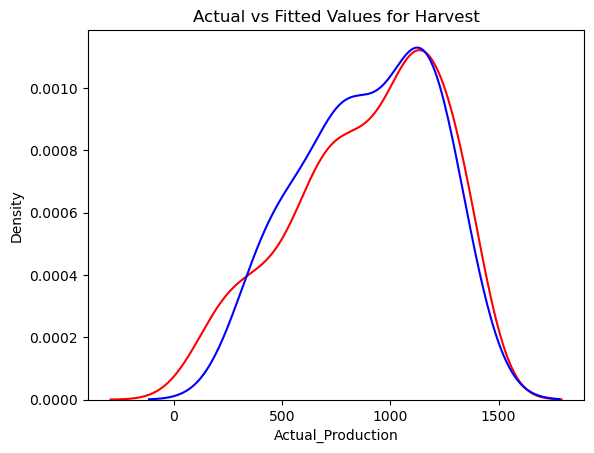

In [43]:
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_predDT, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Harvest')
plt.show()
plt.close()

Random Forest Regression

In [44]:
print(cross_val_score(RandomForestRegressor(), x_train, y_train,cv = 3))

[0.58199251 0.41429534 0.49261575]


In [88]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_predRF = rfr.predict(x_test)

In [89]:
# Accuracy on Training set
print("Training Accuracy is: ", rfr.score(x_train, y_train))
# Accuracy on Testing set
print("Testing Accuracy is: ", rfr.score(x_test, y_test))

Training Accuracy is:  0.9216305786470107
Testing Accuracy is:  0.58201383375105


In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predRF))
print('MSE:', metrics.mean_squared_error(y_test, y_predRF))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predRF)))
print('R2:',  r2_score(y_test, y_predRF))

MAE: 143.76676000000012
MSE: 43069.649535840035
RMSE: 207.53228552646942
R2: 0.5770081154318643


c:\Users\yasas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\yasas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


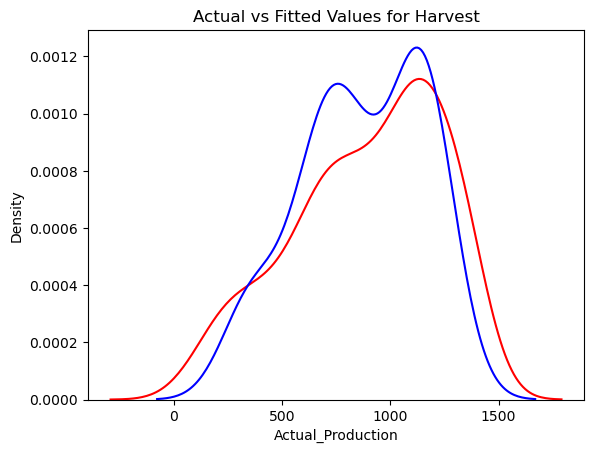

In [48]:
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_predRF, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Harvest')
plt.show()
plt.close()

Gradient Boost Regression

In [49]:
print(cross_val_score(GradientBoostingRegressor(), x_train, y_train,cv = 3))

[0.57228088 0.29706395 0.24829844]


In [50]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_predGB = gbr.predict(x_test)

In [51]:
# Accuracy on Training set
print("Training Accuracy is: ", gbr.score(x_train, y_train))
# Accuracy on Testing set
print("Testing Accuracy is: ", gbr.score(x_test, y_test))

Training Accuracy is:  0.8720708517048978
Testing Accuracy is:  0.6079865537613509


In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predGB))
print('MSE:', metrics.mean_squared_error(y_test, y_predGB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predGB)))
print('R2:',  r2_score(y_test, y_predGB))

MAE: 151.42786232307327
MSE: 39915.37984250812
RMSE: 199.78833760384543
R2: 0.6079865537613509


c:\Users\yasas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\yasas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


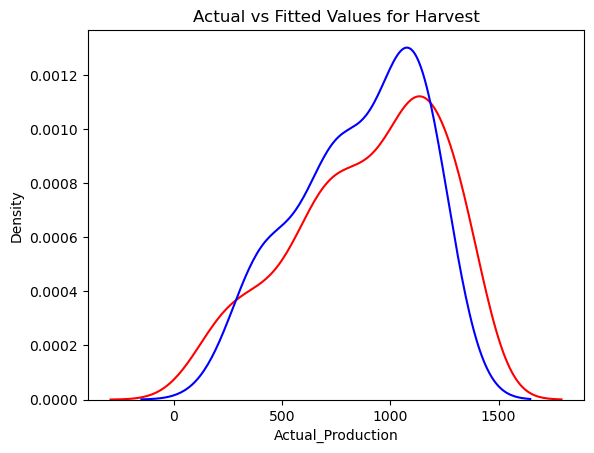

In [53]:
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_predGB, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Harvest')
plt.show()
plt.close()

SGDRegressor

Test model

In [94]:
gbr.predict([[3,840,2,3,1]])

c:\Users\yasas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1394.82175791])

Import model to Pickle

In [ ]:
import pickle
loadModel = pickle.dump(gbr, open('modelDT.dat','wb'))

In [95]:
import pickle
loadModel = pickle.dump(gbr, open('HPmodelGBR.pkl','wb'))

In [ ]:
import joblib 

# save model with joblib 
filename = 'DTmodel.sav'
joblib.dump(dtr, filename)

['DTmodel.sav']

In [ ]:
import pickle
loadModel = pickle.dump(rfr, open('modelRF.pkl','wb'))